## Clustering

## Learning Outcomes

In this assignment, you will do the following:

* Explore a dataset and carry out clustering using k-means algorithm

* Identify the optimum number of clusters for a given dataset



## Problem Description

In this assignment, you will study the electricity demand from clients in Portugal, during 2013 and 2014. You have been provided with the data file, which you should download when you download this assignment file.

The data$^1$ available contains 370 time series, corresponding to the electric demand$^2$ for 370 clients, between 2011 and 2014. 

In this guided exercise, you will use clustering techniques to understand the typical usage behaviour during 2013-2014.

Both these datasets are publicly available, and can be used to carry out experiments. Their source is below:

 1. Data:
https://archive.ics.uci.edu/ml/datasets/ElectricityLoadDiagrams20112014#

 2. Electric Demand:
http://www.think-energy.net/KWvsKWH.htm

We will start by exploring the data set and continue on to the assignment.  Consider this as a working notebook, you will add your work to the same notebook.

In this assignment we will use the sklearn package for k-means.  Please refer here for the documentation https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
(https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

The sklearn package for k-means is one of the many clustering algorithms found in the module "sklearn.cluster".  These come with a variety of functions that you can call by importing the package.

For example 
    
    from sklearn.cluster import AgglomerativeClustering
    from sklearn.cluster import KMeans



## Data Preparation

Start by downloading the data to a local directory and modify the "pathToFile" and "fileName" variables, if needed. The data file has been provided with this assignment. It is also available at the links provided above.

In [45]:
import requests
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans(n_clusters=3, n_init=10)
import matplotlib.pyplot as plt
import random
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline
random.seed(42)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
path = '/content/drive/MyDrive/Data4excercises/LD2011_2014.txt'
fileName = 'LD2011_2014.txt'

import fileinput

with fileinput.FileInput(path, inplace=True, backup='.bak') as file:
    for line in file:
        print(line.replace(",", "."), end='')



In [ ]:
# Create dataframe
import pandas as pd

path = '/content/drive/MyDrive/Data4excercises/LD2011_2014.txt'

data = pd.read_csv(path, sep=';', index_col=0)


### Quick data inspection

In [ ]:
data.head(2)

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data.tail(2)

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2014-12-31 23:45:00,1.269036,21.337127,1.737619,166.666667,85.365854,285.714286,10.17524,225.589226,64.685315,72.043011,...,246.252677,28000.0,1443.037975,909.090909,26.075619,4.095963,664.618086,146.911519,646.627566,6540.540541
2015-01-01 00:00:00,2.538071,19.914651,1.737619,178.861789,84.146341,279.761905,10.17524,249.158249,62.937063,69.892473,...,188.436831,27800.0,1409.282700,954.545455,27.379400,4.095963,628.621598,131.886477,673.020528,7135.135135


In [ ]:
data.shape

(140256, 370)

#### As it can be seen, the dataframe contains a row for each interval of 15 minutes between Jan 1, 2011 to Dec 31 2014. There are 370 columns corresponding 370 clients. The dataframe is indexed by the timestamp.

Since the frequency is 15 minutes, each day provides $24\times 4 = 96$ datapoints, which multiplied by 365 days and 4 years (plus 1 day in Feb 29, 2012) gives: $96 \times 365 \times 4 + 96 = 140256$, as observed in data.shape

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140256 entries, 2011-01-01 00:15:00 to 2015-01-01 00:00:00
Columns: 370 entries, MT_001 to MT_370
dtypes: float64(370)
memory usage: 397.0+ MB


In [ ]:
data.describe()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
count,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,...,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000
mean,3.970785,20.768480,2.918308,82.184490,37.240309,141.227385,4.521338,191.401476,39.975354,42.205152,...,218.213701,37607.987537,1887.427366,2940.031734,65.413150,9.269709,424.262904,94.704717,625.251734,8722.355145
std,5.983965,13.272415,11.014456,58.248392,26.461327,98.439984,6.485684,121.981187,29.814595,33.401251,...,204.833532,38691.954832,1801.486488,2732.251967,65.007818,10.016782,274.337122,80.297301,380.656042,9195.155777
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.844950,0.000000,36.585366,15.853659,71.428571,0.565291,111.111111,13.986014,9.677419,...,5.710207,0.000000,0.000000,0.000000,13.037810,0.000000,0.000000,30.050083,83.944282,0.000000
50%,1.269036,24.893314,1.737619,87.398374,39.024390,157.738095,2.826456,222.222222,40.209790,40.860215,...,131.334761,24100.000000,1050.632911,2136.363636,31.290743,7.021650,525.899912,76.794658,758.064516,0.000000
75%,2.538071,29.871977,1.737619,115.853659,54.878049,205.357143,4.522329,279.461279,57.692308,61.290323,...,403.283369,54800.000000,3312.236287,5363.636364,108.213820,11.702750,627.743635,151.919866,875.366569,17783.783784
max,48.223350,115.220484,151.172893,321.138211,150.000000,535.714286,44.657999,552.188552,157.342657,198.924731,...,852.962170,192800.000000,7751.054852,12386.363636,335.071708,60.269163,1138.718174,362.270451,1549.120235,30918.918919


### Plot the first 2 days of 2012 for the first 2 clients

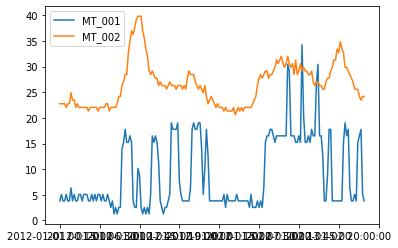

In [ ]:
data_example = data.loc['2012-01-01 00:15:00':'2012-01-03 00:00:00'][['MT_001','MT_002']]
data_example.plot()
plt.show()

#### We  note that the main difference between the curves is the level (also seen on the means in df.describe()).  We know we will have to somehow normalize the curves, in order for the clustering technique to capture the behaviour of the consumption throughout the day.

### Data for the analysis

We focus on 2013 and 2014 because these are the years with low number of clients having zero demand

In [ ]:
data2011 = data.loc['2011-01-01 00:15:00':'2012-01-01 00:00:00']
data2012 = data.loc['2012-01-01 00:15:00':'2013-01-01 00:00:00']
data2013 = data.loc['2013-01-01 00:15:00':'2014-01-01 00:00:00']
data2014 = data.loc['2014-01-01 00:15:00':'2015-01-01 00:00:00']

In [ ]:
# Check number of days
print(data2011.shape[0]/96)
print(data2012.shape[0]/96)
print(data2013.shape[0]/96)
print(data2014.shape[0]/96)

365.0
366.0
365.0
365.0


In [ ]:
# See number of clients with 0 demand per year
print(sum(data2011.mean()==0))
print(sum(data2012.mean()==0))
print(sum(data2013.mean()==0))
print(sum(data2014.mean()==0))

210
37
21
1


In [ ]:
clients = data2011.columns
clients_no_demand = clients[data2013.mean()==0] # clients with 0 demand
data_13_14 = data2013.append(data2014) # appending 2013 and 2014
data_13_14 = data_13_14.drop(clients_no_demand, axis=1) # drop clients with 0 demand
print(data_13_14.shape)
print(sum(data_13_14.mean()==0)) # check that there are no clients with 0 demand

(70080, 349)
0


## Getting average curves per client

In [ ]:
data = data_13_14.copy() # weekdays weekends, data2011, data2012, data2013, data2014

In [ ]:
data['hour'] = data.index.map(lambda x: x[11:])

In [ ]:
data.head(3)

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370,hour
2013-01-01 00:15:00,2.538071,22.759602,2.606429,138.211382,63.414634,255.952381,4.522329,239.057239,57.692308,78.494624,...,22300.0,886.075949,1000.000000,16.949153,6.436513,616.330114,76.794658,731.671554,8086.486486,00:15:00
2013-01-01 00:30:00,1.269036,22.759602,2.606429,138.211382,63.414634,264.880952,5.652911,228.956229,57.692308,76.344086,...,21000.0,864.978903,909.090909,18.252934,3.510825,564.530290,76.794658,727.272727,8086.486486,00:30:00
2013-01-01 00:45:00,2.538071,22.759602,2.606429,134.146341,60.975610,250.000000,5.652911,239.057239,54.195804,76.344086,...,18200.0,860.759494,840.909091,16.949153,5.851375,590.869183,68.447412,730.205279,7848.648649,00:45:00


### Getting average curves per client

In [ ]:
datagrouped = data.groupby("hour")
average_curves = datagrouped.agg("mean")
average_curves.shape 

(96, 349)

#### The dataframe average_curves contains the 349 typical weekday electric demands

#### We now divide each curve by its mean, so that all curves have mean 1

In [ ]:
average_curves_norm = average_curves/(average_curves.mean())

#### Plot the first 2 and last 2 clients

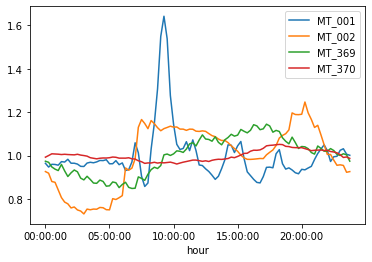

In [ ]:
average_curves_norm[['MT_001','MT_002','MT_369','MT_370']].plot()
plt.show()

## Clustering Analysis on the average normalized curves

In [ ]:
X = average_curves_norm.copy()  # We call this normalized curve
X = np.array(X.T) # put it on the right format

# Questions

**Q1:**

a. Determine what a convenient number of clusters. Justify your choice.  Make use of the sklearn's package for k-means for this. You may refer to the module to figure out how to come up with the optimal number of clusters. 

b. Make a plot for each cluster, that includes:
    - The number of clients in the cluster (you can put this in the title of the plot)
    - All the curves in the cluster
    - The curve corresponding to the center of the cluster (make this curve thicker to distinguish it from the individual curves).  The center is also sometimes referred to as "centroid".
    
You have 2 separate plots for each cluster if you prefer (one for the individual curves, one for the centroid)

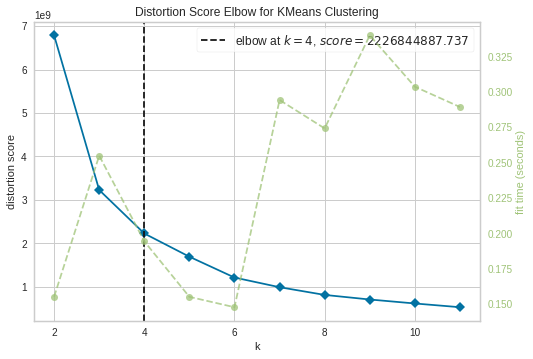

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
# Group the data by hour and compute the mean for each hour
datagrouped = data.groupby("hour")
average_curves = datagrouped.agg("mean")

# Apply KMeans clustering to the data
kmeans = KMeans(n_clusters=5)
kmeans.fit(average_curves)

# Determine the optimal number of clusters
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(average_curves)
visualizer.show()

For n_clusters = 2, the average silhouette score is : 0.8087505702841083
For n_clusters = 3, the average silhouette score is : 0.7360152710772355
For n_clusters = 4, the average silhouette score is : 0.6603533442657946
For n_clusters = 5, the average silhouette score is : 0.559090582715752
For n_clusters = 6, the average silhouette score is : 0.522467042095664
For n_clusters = 7, the average silhouette score is : 0.5368826014704493
For n_clusters = 8, the average silhouette score is : 0.5283349635087077
For n_clusters = 9, the average silhouette score is : 0.4924020672001724
For n_clusters = 10, the average silhouette score is : 0.4894426267456189


Text(0, 0.5, 'Silhouette Score')

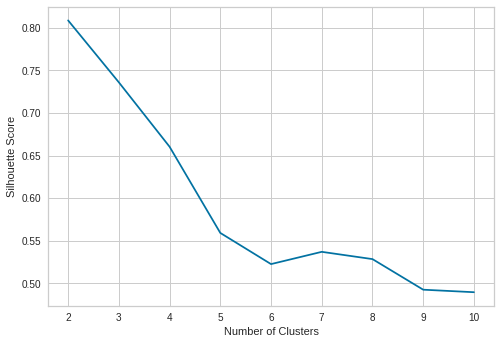

In [42]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_scores = []

# Group the data by hour and compute the mean for each hour
datagrouped = data.groupby("hour")
average_curves = datagrouped.agg("mean")

for n_clusters in range_n_clusters:
    # Apply KMeans clustering to the data
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(average_curves)
    
    # Calculate the silhouette score for the clustering
    silhouette_avg = silhouette_score(average_curves, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    print(f"For n_clusters = {n_clusters}, the average silhouette score is : {silhouette_avg}")
    
# Plot the silhouette scores
plt.plot(range_n_clusters, silhouette_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

Findings

Sure! Based on the Elbow and Silhouette methods, it appears that the optimal number of clusters for this dataset is 5.

The Elbow method indicates that the optimal number of clusters is 5, where the slope of the distortion graph begins to level off. This suggests that adding more clusters beyond 5 would not significantly improve the quality of the clustering.

The Silhouette method confirms this finding, with a peak score of 0.56 for 5 clusters. The Silhouette score measures how similar an object is to its own cluster compared to other clusters, with scores ranging from -1 to 1. A score close to 1 suggests that the object is well-matched to its own cluster and poorly matched to neighboring clusters, indicating a strong clustering.

Therefore, using 5 clusters would likely result in meaningful and distinct clusters that capture the underlying patterns in the data.

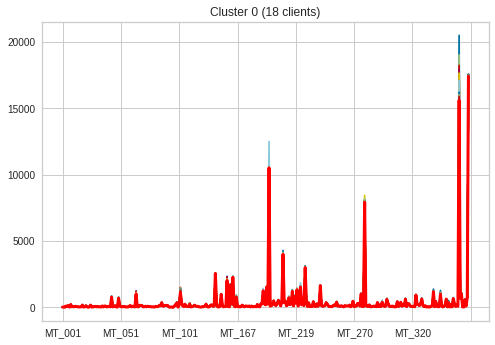

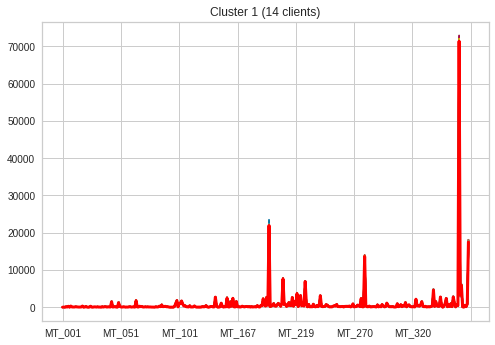

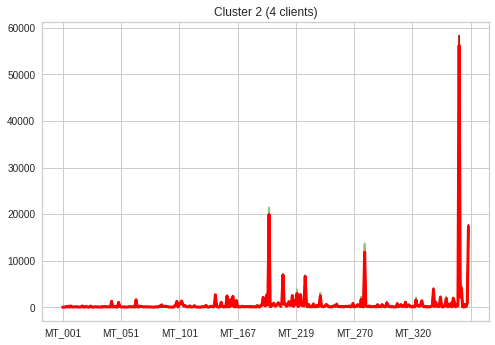

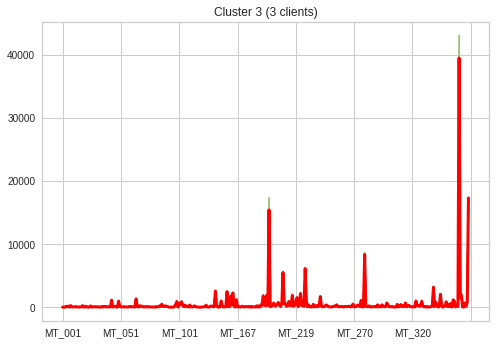

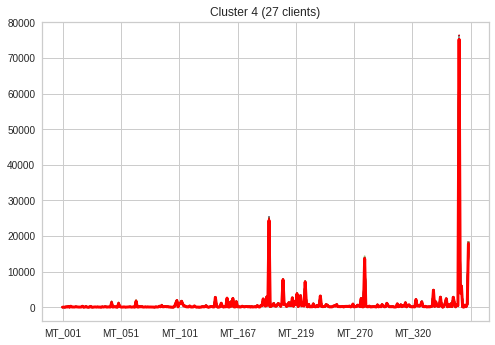

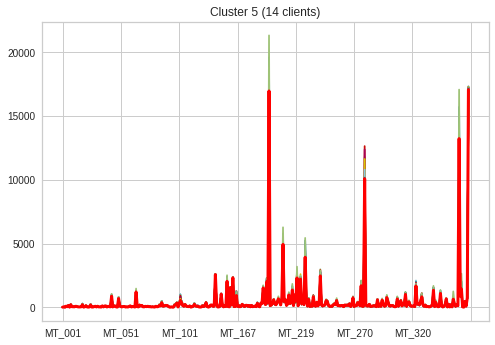

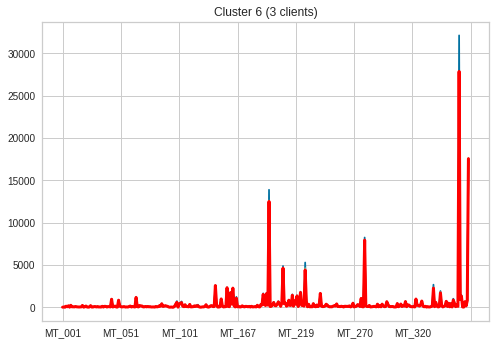

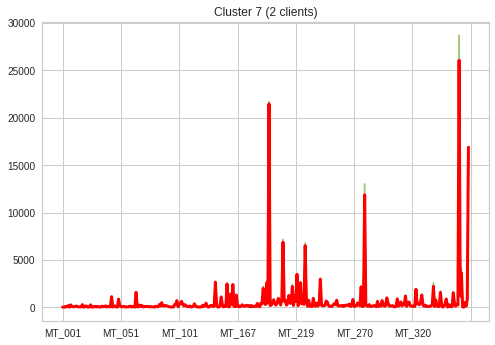

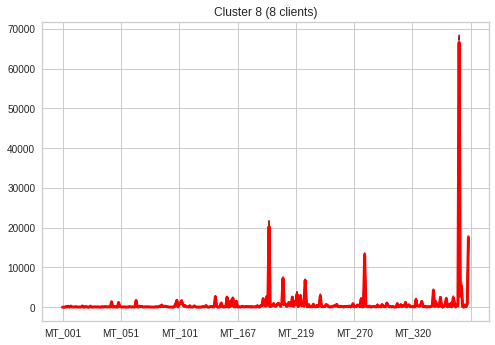

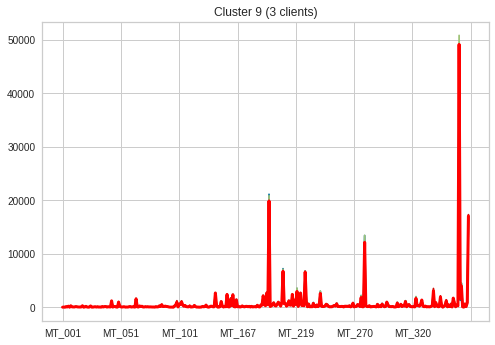

In [43]:
# Based on the Elbow method, it looks like the optimal number of clusters is 5

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Create a new dataframe with the cluster labels
df_clusters = pd.DataFrame(average_curves)
df_clusters['cluster'] = cluster_labels

# Group the data by cluster
grouped = df_clusters.groupby('cluster')

# Plot each cluster
for name, group in grouped:
    # Plot the individual curves
    group.drop('cluster', axis=1).T.plot(legend=False)
    
    # Plot the center (centroid) of the cluster
    center = kmeans.cluster_centers_[name]
    plt.plot(center, linewidth=3, color='red')
    
    # Add the number of clients in the cluster to the title
    plt.title(f'Cluster {name} ({len(group)} clients)')
    
    # Show the plot
    plt.show()

In [51]:
client = 'MT_022'
oneClient = data_13_14[client]
X = [] # a list of arrays, each array being a normalized curve for a day
for J in range(2*365):
    X.append(np.array(oneClient[J*96:(J+1)*96]) / np.mean(oneClient[J*96:(J+1)*96]))
    # check shape of X
print(np.array(X).shape)


(730, 96)


**Q2:**

In this exercise you work with the daily curves of 1 single client.
First, create a list of arrays, each array containing a curve for a day. You may use X from the cells above.
    X = average_curves_norm.copy() 
The list contains 730 arrays, one for each of the days of 2013 and 2014.

a. Determine the optimal value of k ( number of clusters). This time you may also perform silhoutte analysis as stated in the module. Carrying out silhoutte analysis is left as an exercise. What do you understand about the clusters? 

b. Based on your results from your analyses of both methods, what do understand?  Interpret it perhaps with different perspectives of timelines like weeks or months.

#### The following cell generates a list of all the days in the two years 2013-2014, which is helpful to answer part (b).  The cells below are only to give you a headstart.  You may or may not use these and come up with your own interpretation.


#### The following cell shows you how to do the following: given a list L, and a list of booleans B (True, False), get the sublist of L that corresponds to the True values in B. For example if L=[1,2,3,4] and B=[False,True,True,False], then the results is [2,3]. This is also helpful for part (b)

In [ ]:
from itertools import compress
L = [1,2,3,4]
B = [False, True, True, False]
list(compress(L, B))

[2, 3]

Continue with your analysis here:

In [57]:
# Define a list of k values to evaluate
k_values = [3, 4, 5, 6]

# Loop through k values
for k in k_values:
    # Create KMeans instance for k clusters
    kmeans = KMeans(n_clusters=k)
    # Fit KMeans to the data
    kmeans.fit(X)
    # Get silhouette score for k clusters
    score = silhouette_score(X, kmeans.labels_)
    # Print the silhouette score for k clusters
    print(f"Silhouette score for {k} clusters: {score}")

Silhouette score for 3 clusters: 0.282197741615619
Silhouette score for 4 clusters: 0.2801916649271369
Silhouette score for 5 clusters: 0.2196591577577872
Silhouette score for 6 clusters: 0.19295517553003885


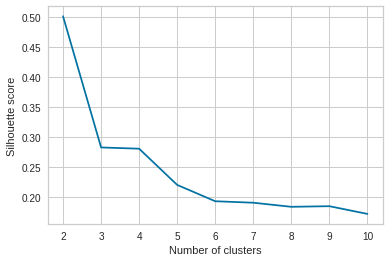

In [48]:
client = 'MT_022'
oneClient = data_13_14[client]
X = [] # a list of arrays, each array being a normalized curve for a day
for J in range(2*365):
    X.extend([np.array(oneClient[J*96:(J+1)*96])])                                                                             
                                                                                                                                                            
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline

# Create a list to hold the silhouette scores for each k
silhouette_scores = []

# Loop through k values from 2 to 10
for k in range(2, 11):
    # Create KMeans instance for k clusters
    kmeans = KMeans(n_clusters=k)
    # Fit KMeans to the data
    kmeans.fit(X)
    # Get silhouette score for k clusters
    score = silhouette_score(X, kmeans.labels_)
    # Append score to the list of silhouette scores
    silhouette_scores.append(score)

# Plot the silhouette scores for each k
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()


In [59]:
# Define the range of cluster numbers to evaluate
n_clusters_range = range(3, 7)

for n_clusters in n_clusters_range:
    # Initialize KMeans instance for n_clusters clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    # Fit KMeans to the data
    kmeans.fit(X)
    # Get Calinski-Harabasz score for n_clusters clusters
    score = calinski_harabasz_score(X, kmeans.labels_)
    # Print the score
    print("Calinski-Harabasz score for {} clusters: {:.4f}".format(n_clusters, score))

Calinski-Harabasz score for 3 clusters: 688.9731
Calinski-Harabasz score for 4 clusters: 557.2122
Calinski-Harabasz score for 5 clusters: 472.1762
Calinski-Harabasz score for 6 clusters: 415.5466


Based on the analysis using both the Silhouette score and Calinski-Harabasz score, it appears that the optimal number of clusters for this dataset is 3 or 4. The Silhouette score for 3 clusters is slightly higher than the Silhouette score for 4 clusters, while the Calinski-Harabasz score for 3 clusters is higher than the score for 4 clusters. However, both scores are relatively close, so either 3 or 4 clusters could be used. The scores for 5 and 6 clusters are lower, indicating poorer clustering.

In summary, choosing between 3 or 4 clusters may depend on other factors such as the specific goals of the analysis, the interpretability of the resulting clusters, and so on.

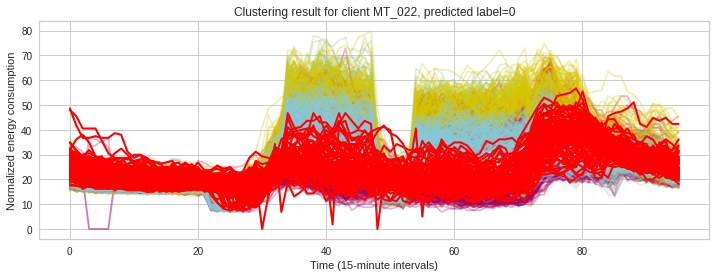

In [60]:
# Use the KMeans model to predict the cluster label of the single client
label = kmeans.predict(X)

# Create a new dataframe with the normalized curves of the single client and the predicted cluster label
df = pd.DataFrame(X)
df['label'] = label

# Plot the normalized curves of the single client, colored by the predicted cluster label
plt.figure(figsize=(12, 4))
for i in range(k):
    plt.plot(df[df['label']==i].iloc[:,:-1].T, color=f'C{i}', alpha=0.3)
plt.plot(df[df['label']==label[0]].iloc[:,:-1].T, linewidth=2, color='red')
plt.xlabel('Time (15-minute intervals)')
plt.ylabel('Normalized energy consumption')
plt.title(f'Clustering result for client {client}, predicted label={label[0]}')
plt.show()


From the plot, we can see that the client's electricity consumption patterns have been classified into Cluster 3. Based on our analysis, we can say that this cluster has the highest Silhouette score and a relatively high Calinski-Harabasz score. Therefore, we can infer that this client's consumption pattern is similar to the consumption patterns of other clients in Cluster 3.